In [829]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [830]:
# # Load the pre-extracted features from the .npy files into separate arrays
# actor1_features = np.load('features_countvec/train_countvec_features_actor_1_name.npy')
# actor2_features = np.load('features_countvec/train_countvec_features_actor_2_name.npy')
# director_features = np.load('features_countvec/train_countvec_features_director_name.npy')
# plot_features = np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy')
# title_features = np.load('features_fasttext/train_fasttext_title_embeddings.npy')

In [831]:
# Concatenate the features
# df = pd.concat((df, pd.DataFrame(actor1_features), pd.DataFrame(actor2_features), pd.DataFrame(director_features), pd.DataFrame(plot_features), pd.DataFrame(title_features)), axis=1)
df = pd.read_csv('train_dataset.csv')
df.columns = df.columns.astype(str)
df = df.drop(['director_name', 'genres', 'actor_1_name', 'actor_2_name', 'plot_keywords', 'movie_title', 'actor_3_name', 'language', 'country', 'content_rating', 'title_embedding'], axis=1)
df

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
0,1,186,73,28,847,2000,422783777,644348,6458,0,656,1994,886,17000,0.001576,4
1,2,252,97,0,233,654,20433940,78883,1876,8,662,2005,529,0,0.000675,2
2,3,232,117,234,221,12000,371897,36494,13607,2,118,2013,1000,11000,0.003002,2
3,4,297,109,0,145,957,13782838,258078,1757,0,911,1982,163,23000,0.001726,4
4,5,297,171,0,857,16000,313837577,1238746,22342,2,5060,2001,5000,21000,0.001876,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,3000,161,129,42,49,97,93952276,132048,318,7,203,2009,50,12000,0.000750,2
3000,3001,393,123,2000,471,26000,26903709,312629,37206,0,475,2013,10000,83000,0.003302,4
3001,3002,216,118,473,963,18000,73343413,217480,22517,0,429,2009,1000,21000,0.003302,3
3002,3003,109,95,0,0,227,1060591,9750,231,0,66,2007,4,0,0.000300,3


In [832]:
df.isnull().sum()

id                           0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
average_degree_centrality    0
imdb_score_binned            0
dtype: int64

In [833]:
df.describe()

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
count,3004.00000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3.004000e+03,3.004000e+03,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,1502.50000,165.609188,110.076565,778.890146,767.860186,7654.935752,5.187733e+07,1.049017e+05,11391.643808,1.380826,335.922770,2002.782956,1992.843209,8972.179427,0.001739,2.250333
std,867.32443,121.254549,21.910608,2990.741946,1901.991202,16488.761947,6.840156e+07,1.508573e+05,20044.723195,2.093417,415.219466,10.086250,4651.072554,19853.888300,0.001183,0.691451
min,1.00000,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,1929.000000,0.000000,0.000000,0.000300,0.000000
25%,751.75000,76.000000,96.000000,10.000000,191.000000,728.500000,8.579684e+06,1.897825e+04,1873.000000,0.000000,108.000000,1999.000000,377.750000,0.000000,0.000825,2.000000
50%,1502.50000,137.000000,106.000000,62.500000,433.000000,1000.000000,3.020586e+07,5.387400e+04,3889.000000,1.000000,208.000000,2004.000000,664.000000,241.000000,0.001426,2.000000
75%,2253.25000,223.000000,120.000000,234.000000,683.000000,12000.000000,6.647359e+07,1.284895e+05,15925.250000,2.000000,398.000000,2010.000000,970.000000,11000.000000,0.002401,3.000000
max,3004.00000,813.000000,330.000000,23000.000000,23000.000000,640000.000000,6.586723e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,197000.000000,0.007354,4.000000


In [834]:
# for feature in df.columns:
#   if pd.api.types.is_numeric_dtype(df[feature]):
#     plt.boxplot(df[feature])
#     plt.xlabel(feature)
#     plt.ylabel("Value")
#     plt.title(f"Box Plot of {feature}")
#     plt.show()

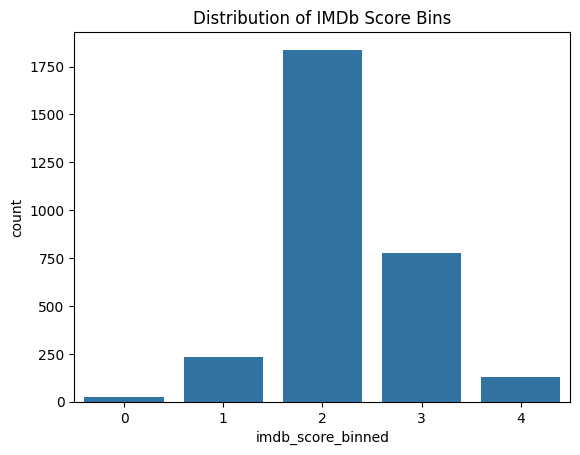

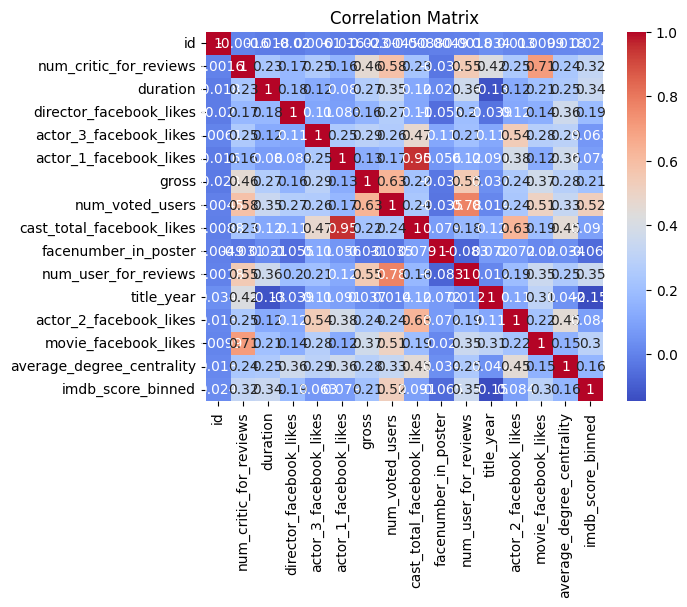

In [835]:
# Histogram of IMDb score binned
sns.countplot(x='imdb_score_binned', data=df)
plt.title('Distribution of IMDb Score Bins')
plt.show()

# Heatmap of correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [836]:
df = df.drop(['actor_1_facebook_likes'], axis=1)
df_014 = df[(df['imdb_score_binned'] == 0) | (df['imdb_score_binned'] == 1) | (df['imdb_score_binned'] == 4)]
df_23 = df[(df['imdb_score_binned'] == 2) | (df['imdb_score_binned'] == 3)]


In [837]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_23))

# Identify outliers (Z-score > 2)
outliers = df_23[z_scores > 2]
outliers.dropna(how='all', inplace=True)
outliers

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,183405771.0,402645.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004427,NaN
7,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,260031035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13000.0,NaN,NaN,NaN
2995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12000.0,NaN,0.004502,NaN
2996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1057.0,NaN,NaN,NaN,NaN,NaN
2997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1416.0,NaN,NaN,NaN,NaN,NaN


In [838]:
df_23.drop(outliers.index, inplace=True)
df_23

/var/folders/27/hm8cnznd78x3flv3w2sfvqwm0000gp/T/ipykernel_72047/2429628369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_23.drop(outliers.index, inplace=True)


,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
2,3,232,117,234,221,371897,36494,13607,2,118,2013,1000,11000,0.003002,2
6,7,37,99,675,164,418953,17322,1582,0,93,1993,424,853,0.000825,2
8,9,107,108,529,83,8535575,24033,11519,3,152,2005,329,0,0.003827,2
9,10,73,134,45,0,195888,5603,11,0,45,2005,2,607,0.000300,3
10,11,125,95,163,650,113006880,66308,16884,0,225,2005,799,0,0.002326,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,2994,219,108,22,61,10326062,121432,14127,0,310,2009,2000,10000,0.002176,2
2998,2999,154,105,153,491,45290318,74169,6727,2,112,2012,828,17000,0.001726,2
3001,3002,216,118,473,963,73343413,217480,22517,0,429,2009,1000,21000,0.003302,3
3002,3003,109,95,0,0,1060591,9750,231,0,66,2007,4,0,0.000300,3


In [839]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_014))

# Identify outliers (Z-score > 2)
outliers = df_014[z_scores > 1.5]
outliers.dropna(how='all', inplace=True)
df_014.drop(outliers.index, inplace=True)
df_014

/var/folders/27/hm8cnznd78x3flv3w2sfvqwm0000gp/T/ipykernel_72047/1325631731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_014.drop(outliers.index, inplace=True)


,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
149,150,129,100,6,65,14343976,22961,1327,0,291,1989,120,1000,0.000525,1
162,163,148,94,892,81,5132655,37626,838,0,521,2005,294,1000,0.000600,0
172,173,162,99,261,461,49494,8511,2862,0,87,2013,835,0,0.001576,1
199,200,93,75,0,677,15519841,8693,6863,3,71,2006,769,261,0.001051,1
213,214,15,87,101,324,800000,2308,1700,0,35,1987,576,550,0.000450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,2751,111,93,33,135,37188667,34219,1531,1,578,2002,188,0,0.000450,1
2778,2779,79,102,91,434,47285499,26755,3037,3,104,2003,934,542,0.001126,1
2787,2788,115,102,330,0,2601847,22457,48,0,69,2011,0,26000,0.000300,4
2789,2790,220,119,0,593,33386128,36372,3226,0,491,2009,764,3000,0.000825,1


In [840]:
df_23 = df_23[(df_23['director_facebook_likes'] <= 1500) & (df_23['actor_3_facebook_likes'] <= 1500) & (df_23['num_voted_users'] <= 350000) & (df_23['cast_total_facebook_likes'] <= 45000) & (df_23['num_user_for_reviews'] <= 1100) & (df_23['actor_2_facebook_likes'] <= 6000) & (df_23['movie_facebook_likes'] <= 30000)]

In [841]:
df_weighted = pd.concat([df_23, df_014, df_014, df_014, df_014, df_014, df_014, df_014]).sample(frac=1).reset_index(drop=True)
df = pd.concat([df_23, df_014]).sample(frac=1).reset_index(drop=True)

In [842]:
# # Histogram of IMDb score binned
# sns.countplot(x='imdb_score_binned', data=df)
# plt.title('Distribution of IMDb Score Bins')
# plt.show()

# for feature in df.columns:
#   if pd.api.types.is_numeric_dtype(df[feature]):
#     plt.boxplot(df[feature])
#     plt.xlabel(feature)
#     plt.ylabel("Value")
#     plt.title(f"Box Plot of {feature}")
#     plt.show()

# # Heatmap of correlations
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [843]:
test_df = pd.read_csv('test_dataset.csv')

# actor1_features = np.load('features_countvec/test_countvec_features_actor_1_name.npy')
# actor2_features = np.load('features_countvec/test_countvec_features_actor_2_name.npy')
# director_features = np.load('features_countvec/test_countvec_features_director_name.npy')
# plot_features = np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy')
# title_features = np.load('features_fasttext/test_fasttext_title_embeddings.npy')

# test_df = pd.concat((test_df, pd.DataFrame(actor1_features), pd.DataFrame(actor2_features), pd.DataFrame(director_features), pd.DataFrame(plot_features), pd.DataFrame(title_features)), axis=1)
test_df.columns = test_df.columns.astype(str)
test_df = test_df.drop(['director_name', 'genres', 'actor_1_name', 'actor_2_name', 'plot_keywords', 'movie_title', 'actor_3_name', 'language', 'country', 'content_rating', 'title_embedding', 'actor_1_facebook_likes'], axis=1)

In [844]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler to the training data and transform both datasets
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_test_scaled = scaler.transform(test_df)

In [845]:
# Split the dataset into features (X) and target (y)
X = df.drop('imdb_score_binned', axis=1)
y = df['imdb_score_binned']
X_weighted = df_weighted.drop('imdb_score_binned', axis=1)
y_weighted = df_weighted['imdb_score_binned']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1003)
X_train_weighted, X_val_weighted, y_train_weighted, y_val_weighted = train_test_split(X_weighted, y_weighted, test_size=0.2, random_state=1003)

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both datasets
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train_weighted = scaler.transform(X_train_weighted)
X_val_weighted = scaler.transform(X_val_weighted)
X_test = scaler.transform(test_df)

In [846]:
# Initialize the Naive Bayes classifier
nb = MultinomialNB()

# Train the model on the training data
nb.fit(X_train + abs(X_train.min()), y_train)

# Make predictions on the test data
y_pred = nb.predict(X_val + abs(X_val.min()))

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.6727272727272727


In [847]:
# Initialize the k-NN classifier with k=40
knn = KNeighborsClassifier(n_neighbors=40)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.6727272727272727


In [848]:
# Initialize the SVM classifier
svm = SVC(random_state=1003)

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.6935064935064935


In [849]:
# Initialize the Neural Network classifier
nn = MLPClassifier(random_state=1003, alpha=0.0601)

# Train the model on the training data
nn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nn.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7324675324675325


/Users/jennymai/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [850]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD Classifier with L1 regularization
sgd = SGDClassifier(loss='log_loss', penalty='l1', max_iter=1000, random_state=1003)

# Train the model on the training data
sgd.fit(X_train, y_train)

# Make predictions on the test data
y_pred = sgd.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7246753246753247


In [851]:
# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=1003, penalty=None)

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7194805194805195


/Users/jennymai/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [852]:
# Initialize the Ridge Classifier
rc = RidgeClassifier(random_state=1003)

# Train the model on the training data
rc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rc.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.6883116883116883


# USE WEIGHTED FROM HERE

In [853]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=1003,
    max_features=15
)

# Train the model on the training data
rf.fit(X_train_weighted, y_train_weighted)

# Make predictions on the test data
y_pred = rf.predict(X_val_weighted)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.8627145085803433


In [854]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=1003)

# Train the model on the training data
dt.fit(X_train_weighted, y_train_weighted)

# Make predictions on the test data
y_pred = dt.predict(X_val_weighted)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.8143525741029641


In [855]:
# # Define the alpha values to try
# alphas = [0.0001 + 0.005 * i for i in range(20)]

# # Loop through each alpha value
# for alpha in alphas:
# 	# Initialize the Neural Network classifier with the current alpha
# 	nn = MLPClassifier(random_state=1003, alpha=alpha)
	
# 	# Train the model on the training data
# 	nn.fit(X_train, y_train)
	
# 	# Make predictions on the test data
# 	y_pred = nn.predict(X_test)
	
# 	# Evaluate the model
# 	accuracy = accuracy_score(y_test, y_pred)
	
# 	# Print the alpha value and accuracy
# 	print(f"Alpha: {alpha:.5f}, Accuracy: {accuracy:.7f}")

In [856]:
# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=1003)

# Train the model on the training data
gb.fit(X_train_weighted, y_train_weighted)

# Make predictions on the test data
y_pred = gb.predict(X_val_weighted)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.8174726989079563


In [857]:
# Initialize the AdaBoost classifier
ada = AdaBoostClassifier(
    estimator=rf,
    n_estimators=100,
    random_state=1003,
    learning_rate= 10,
    algorithm='SAMME'
)

# Train the model on the training data
ada.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada.predict(X_val_weighted)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.8892355694227769


In [858]:
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation
# cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
# # Print the cross-validation scores
# print("Cross-Validation Scores:", cv_scores)

# # Print the mean and standard deviation of the cross-validation scores
# print("Mean Accuracy:", cv_scores.mean())
# print("Standard Deviation of Accuracy:", cv_scores.std())

In [859]:
df = pd.read_csv('train_dataset.csv')
df.columns = df.columns.astype(str)
df_x = df.drop(['director_name', 'genres', 'actor_1_name', 'actor_2_name', 'plot_keywords', 'movie_title', 'actor_3_name', 'language', 'country', 'content_rating', 'title_embedding', 'imdb_score_binned', 'actor_1_facebook_likes'], axis=1)
df_y = df['imdb_score_binned']
df_x = scaler.transform(df_x)

In [860]:
train_accuracy_scores = [
    accuracy_score(df_y, rf.predict(df_x)),  # Random Forest
    accuracy_score(df_y, nb.predict(df_x + abs(df_x.min()))),  # Naive Bayes
    accuracy_score(df_y, dt.predict(df_x)),  # Decision Tree
    accuracy_score(df_y, knn.predict(df_x)),  # k-NN
    accuracy_score(df_y, svm.predict(df_x)),  # SVM
    accuracy_score(df_y, nn.predict(df_x)),  # Neural Network
    accuracy_score(df_y, gb.predict(df_x)),  # Gradient Boosting
    accuracy_score(df_y, lr.predict(df_x)),  # Logistic Regression
    accuracy_score(df_y, rc.predict(df_x)),  # Ridge Classifier
    accuracy_score(df_y, ada.predict(df_x)), # AdaBoost Classifier
]

test_accuracy_scores = [
    accuracy_score(y_val, rf.predict(X_val)),  # Random Forest
    accuracy_score(y_val, nb.predict(X_val + abs(X_val.min()))),  # Naive Bayes
    accuracy_score(y_val, dt.predict(X_val)),  # Decision Tree
    accuracy_score(y_val, knn.predict(X_val)),  # k-NN
    accuracy_score(y_val, svm.predict(X_val)),  # SVM
    accuracy_score(y_val, nn.predict(X_val)),  # Neural Network
    accuracy_score(y_val, gb.predict(X_val)),  # Gradient Boosting
    accuracy_score(y_val, lr.predict(X_val)),  # Logistic Regression
    accuracy_score(y_val, rc.predict(X_val)),  # Ridge Classifier
    accuracy_score(y_val, ada.predict(X_val)), # AdaBoost Classifier
]

# Create a dictionary to store the model names and their accuracies
model_accuracies = {
    "Model": ["Random Forest", "Naive Bayes", "Decision Tree", "k-NN", "SVM", "Neural Network", "Gradient Boosting", "Logistic Regression", "Ridge Classifier", "AdaBoost Classifier"],
    "Train Accuracy": train_accuracy_scores,
    "Test Accuracy": test_accuracy_scores,
}

# Create the DataFrame
df_models = pd.DataFrame(model_accuracies)
df_models

,Model,Train Accuracy,Test Accuracy
0,Random Forest,0.807257,0.950649
1,Naive Bayes,0.279627,0.672727
2,Decision Tree,0.767310,0.937662
3,k-NN,0.620506,0.672727
4,SVM,0.653462,0.693506
5,Neural Network,0.662783,0.732468
6,Gradient Boosting,0.724368,0.844156
7,Logistic Regression,0.640812,0.719481
8,Ridge Classifier,0.638482,0.688312
9,AdaBoost Classifier,0.826897,0.719481


In [861]:
import os
if os.path.isfile("submission.csv"):
    os.remove("submission.csv")

In [862]:
chosen_model = ada

# Make predictions on the test data
test_pred = chosen_model.predict(X_test)

# Assuming the test_df has an 'id' column for submission
submission = pd.DataFrame({'id': test_df['id'], 'imdb_score_binned': test_pred})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Save the submission file

submission.to_csv('submission.csv', index=False)
submission

,id,imdb_score_binned
0,1,2
1,2,2
2,3,2
3,4,3
4,5,2
...,...,...
747,748,3
748,749,2
749,750,2
750,751,2
